In [ ]:
#happy with

# ET-AML-CALR
# aET-CALR .
# bET-CALR .
# bPMF-CALR .
# cPMF-CALR .
# dET-CALR .
# eET-CALR . 

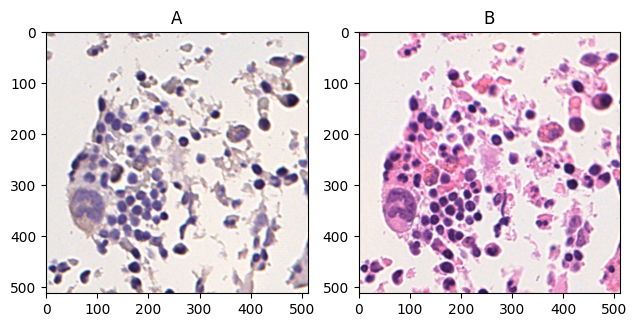

In [4]:
#double check these are actually megs

import matplotlib.pyplot as plt
import cv2
import os

ihc_img_path = "/well/rittscher/users/qdv200/MPN/processed_CALR_IHC_megs/registered_CALR_segs/ihc2he/testA"
he_img_path = "/well/rittscher/users/qdv200/MPN/processed_CALR_IHC_megs/registered_CALR_segs/ihc2he/testB"

# Get list of images
ihc_imgs = os.listdir(ihc_img_path)
he_imgs = os.listdir(he_img_path)

slide = "dET-CALR"

#subset files by image string
ihc_imgs = [i for i in ihc_imgs if slide in i] 
he_imgs = [i for i in he_imgs if slide in i]

num = 1
i = ihc_imgs[num]

# Create subplots
fig, axs = plt.subplots(1, 2)
axs[0].imshow(cv2.imread(os.path.join(ihc_img_path, i)))
axs[0].set_title('A')
axs[1].imshow(cv2.imread(os.path.join(he_img_path, i)))
axs[1].set_title('B')

fig.tight_layout()
plt.show()

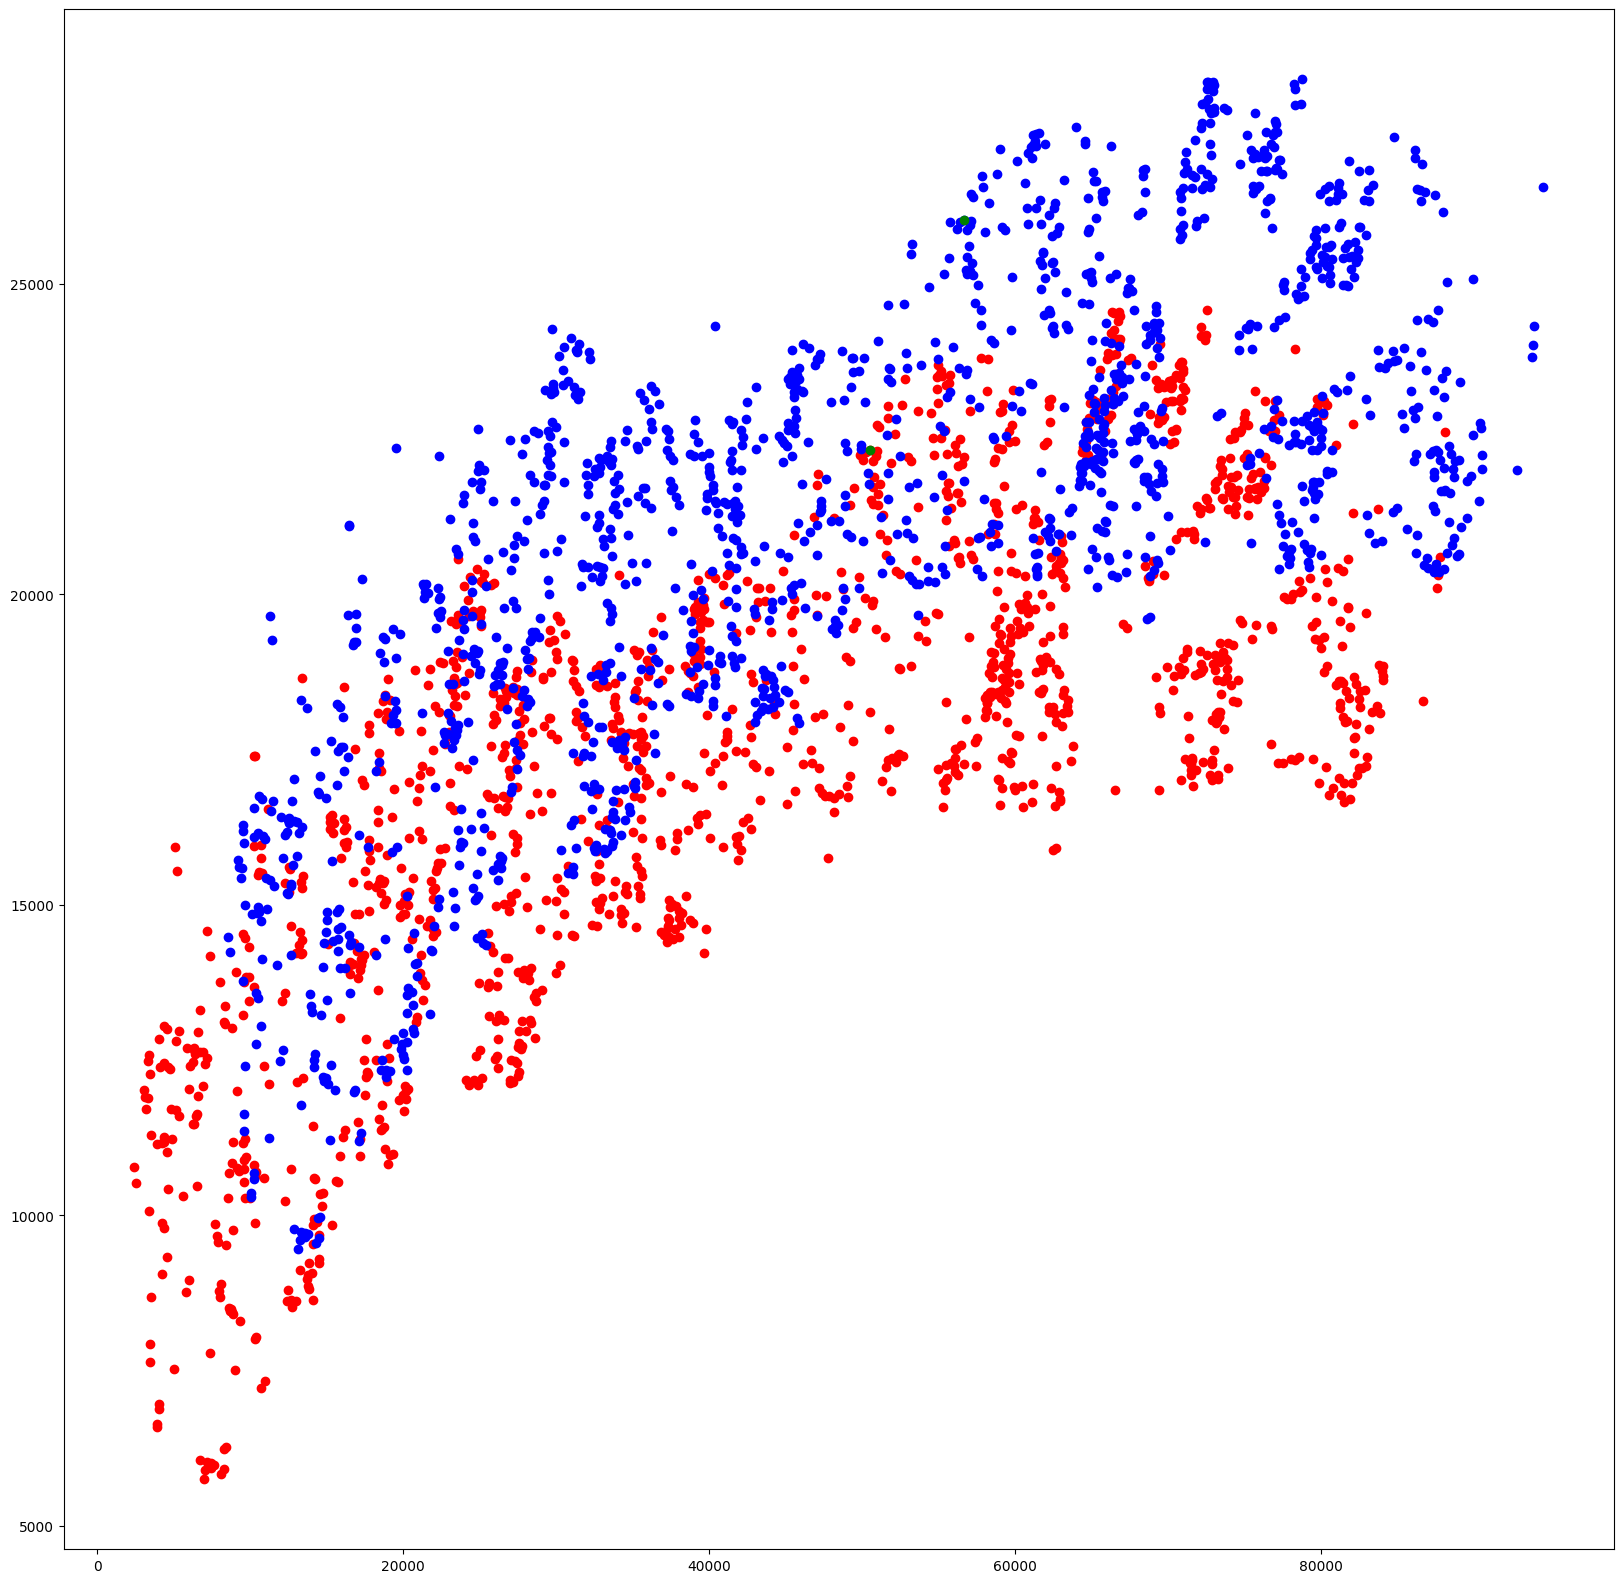

In [23]:
#check registration is good

slide_name = "aPMF-CD34"

#check the pickle file is correct

new_path = os.path.join("/well/rittscher/users/qdv200/MPN/processed_CALR_IHC_megs/registered_CALR_segs/", slide_name + ".p")

import pickle

with open(new_path, 'rb') as handle:
    dict = pickle.load(handle)

ihc_x =[]
ihc_y = []
he_x = []
he_y = []

for key in dict:
    ihc_x.append(dict[key]['ihc'][0])
    ihc_y.append(dict[key]['ihc'][1])
    he_x.append(dict[key]['he'][0])
    he_y.append(dict[key]['he'][1])

plt.scatter(ihc_x, ihc_y, c='r')
plt.scatter(he_x, he_y, c='b')
plt.scatter(he_x[10], he_y[10], c='g')
plt.scatter(ihc_x[10], ihc_y[10], c='g')
plt.show()


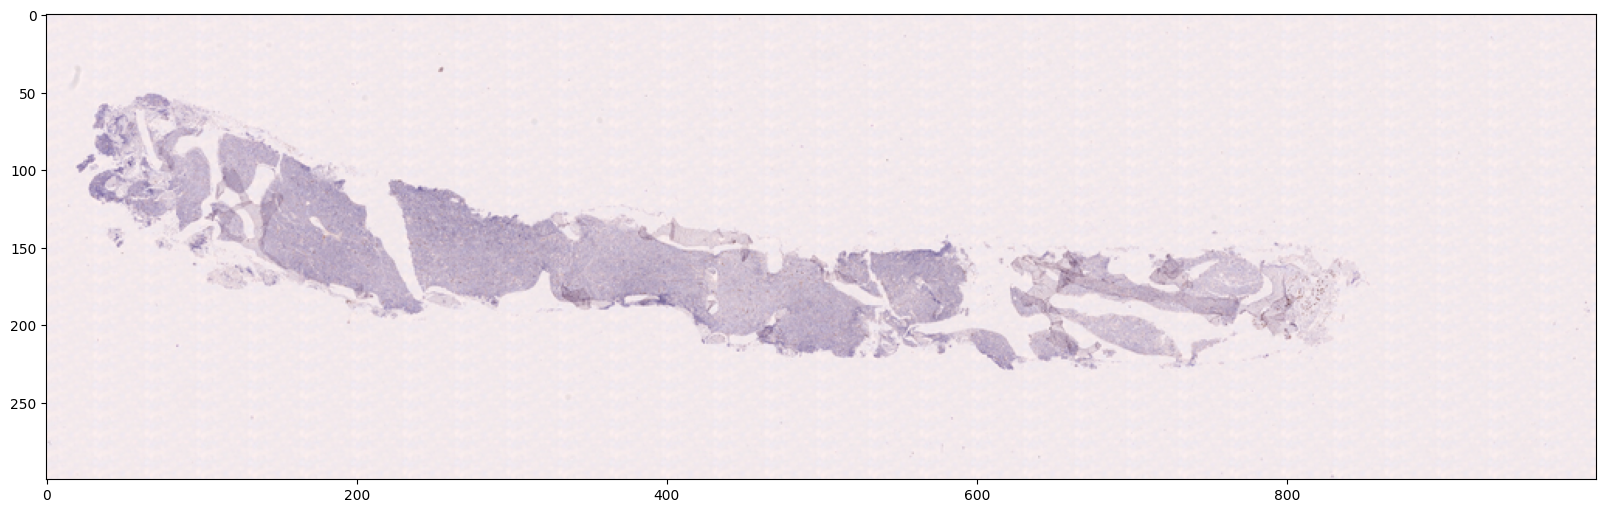

In [25]:
#overlay registration on ihc image to see why not working

import openslide
from openslide import open_slide

base = "/well/rittscher/users/qdv200/MPN/HE-IHC-BMT"
#slide_id = "b-PMF-CALR-2021-02-19-11-02-12.ndpi"
slide_id = "a-PMF-CD34-2021-02-16-11-34-53.ndpi"


image_slide = open_slide(os.path.join(base, slide_id))

plt.imshow(image_slide.get_thumbnail((1000,1000)))
#plt.scatter(ihc_x, ihc_y, c='r')

Text(0.5, 1.0, 'aPMF-CD34')

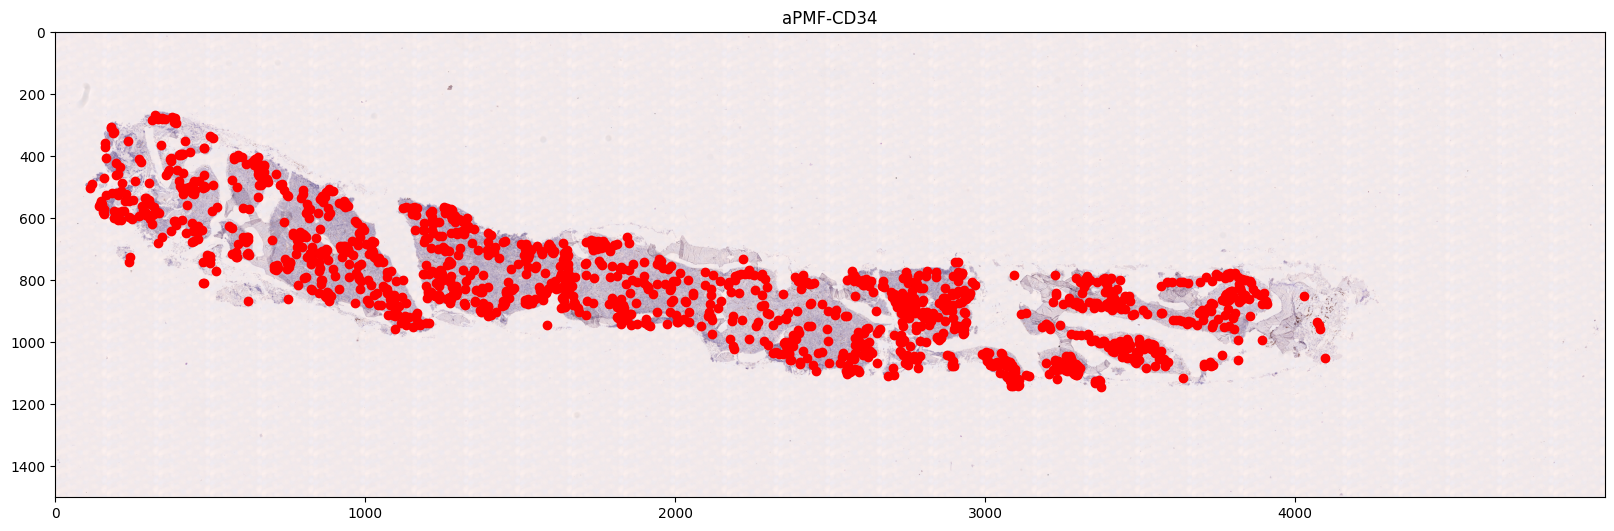

In [26]:
#as image

import numpy as np

orig_dimensions = image_slide.dimensions

im = image_slide.get_thumbnail((5000,5000))

im_RGB = im.convert('RGB')
im = np.array(im_RGB)

dimensions = im.shape
# print(dimensions)
# print(orig_dimensions)

scale_x = orig_dimensions[0]/dimensions[1]
scale_y = orig_dimensions[1]/dimensions[0]

new_x = [x / scale_x for x in ihc_x]
new_y = [x / scale_y for x in ihc_y]

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20, 20]
plt.imshow(im)
#plt.scatter(scatter_x, scatter_y)
plt.scatter(new_x, new_y, c="red")
plt.title(slide_name)

In [30]:
#just get a single image

#for each key in dictionary get the meg location and then the 512x512 image with the meg at the center

he_slide_id = "a-PMF-2021-02-08-11-05-43-CD34.ndpi"
ihc_slide_id = "a-PMF-CD34-2021-02-16-11-34-53.ndpi"


ihc_image_slide = open_slide(os.path.join(base, ihc_slide_id))
he_image_slide = open_slide(os.path.join(base, he_slide_id))

path = "/well/rittscher/users/qdv200/MPN/processed_CALR_IHC_megs/registered_CALR_segs"
image = "aPMF-CD34"

#first get the ihc_img
for key in dict.keys():

    ihc = dict[key]['ihc']
    he = dict[key]['he']

    ihc_tl = (int(ihc[0] - 256), int(ihc[1] - 256))
    he_tl = (int(he[0] - 256), int(he[1] - 256))

    ihc_patch = ihc_image_slide.read_region(ihc_tl, 0, (512,512))
    he_patch = he_image_slide.read_region(he_tl, 0, (512,512))

    ihc_patch = np.array(ihc_patch)
    he_patch = np.array(he_patch)

    ihc_img_path = os.path.join(path, image, "ihc_img", image + "_" + str(key) + ".png")
    he_img_path = os.path.join(path, image, "he_img", image + "_" + str(key) + ".png")

    cv2.imwrite(ihc_img_path, ihc_patch)
    cv2.imwrite(he_img_path, he_patch) 

    # #subplots
    # fig, axs = plt.subplots(1, 2)
    # axs[0].imshow(ihc_patch)
    # axs[0].set_title('IHC')
    # axs[1].imshow(he_patch)
    # axs[1].set_title('HE')

    # plt.show()

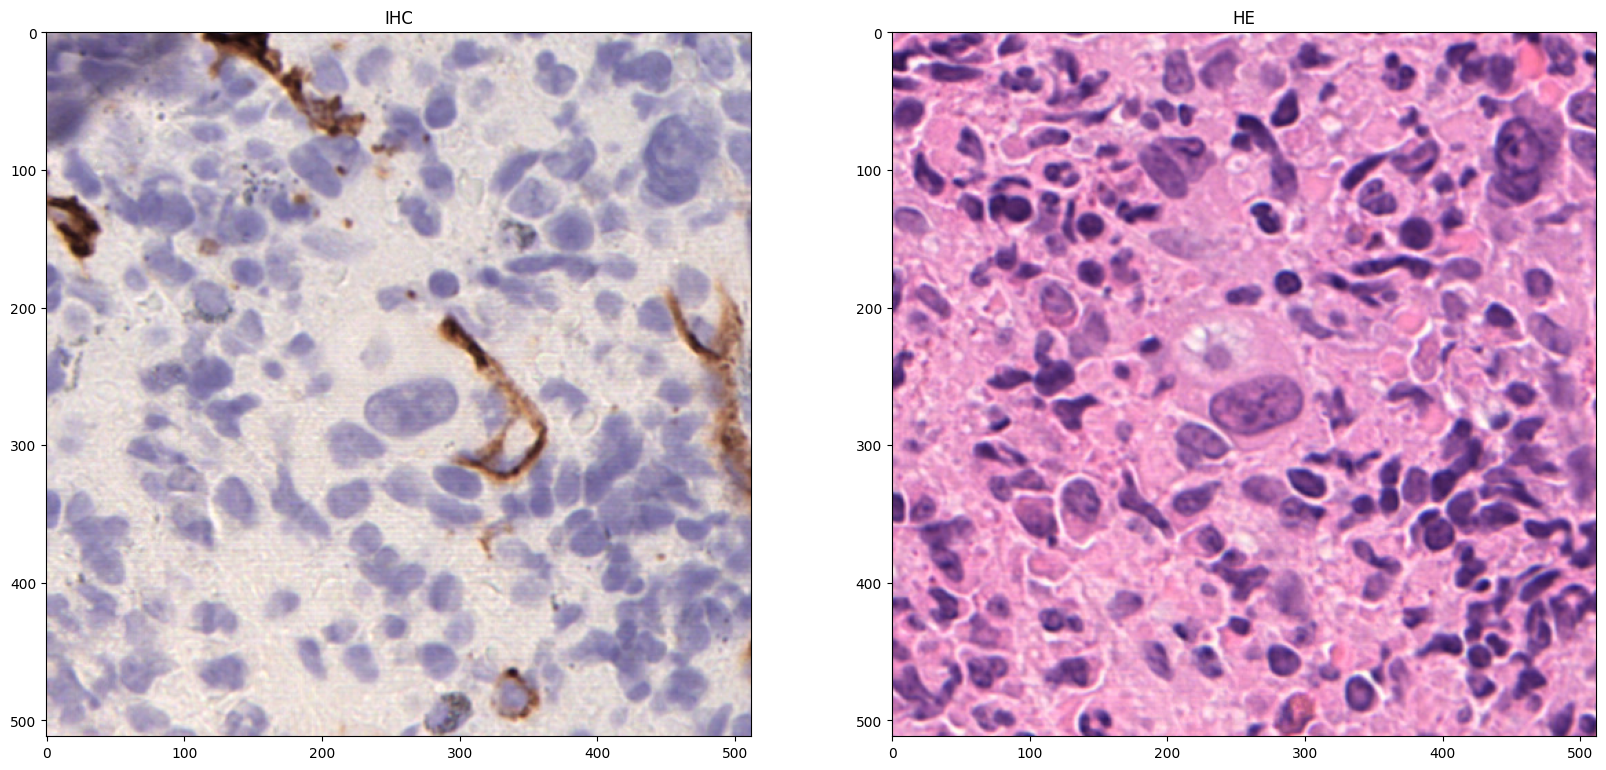

In [35]:
#double check a single file again

im1 = cv2.imread("/well/rittscher/users/qdv200/MPN/processed_CALR_IHC_megs/registered_CALR_segs/ET-AML-CALR/ihc_img/ET-AML-CALR_10.png")
im2 = cv2.imread("/well/rittscher/users/qdv200/MPN/processed_CALR_IHC_megs/registered_CALR_segs/ET-AML-CALR/he_img/ET-AML-CALR_10.png")

fig, axs = plt.subplots(1, 2)
axs[0].imshow(im1)
axs[0].set_title('IHC')
axs[1].imshow(im2)
axs[1].set_title('HE')

plt.show()

In [36]:
image

'aPMF-CD34'

In [37]:
#now move into test and train datasets

import random

#80 20 split for train and test

#list all files in the ihc_img folder
ihc_img_path = os.path.join(path, image, "ihc_img")
he_img_path = os.path.join(path, image, "he_img")

ihc_img_files = os.listdir(ihc_img_path)
he_img_files = os.listdir(he_img_path)

#randomly select 80% of the files for train and 20% for test
train_img_files = random.sample(ihc_img_files, int(len(ihc_img_files)*0.8))

#remove the train files from the list of all files to get the test files
test_img_files = [x for x in ihc_img_files if x not in train_img_files]

#move the train files to a new folder using python
train_ihc_img_path = os.path.join(path,  "ihc2he/trainA")  
train_he_img_path = os.path.join(path, "ihc2he/trainB")

test_ihc_img_path = os.path.join(path, "ihc2he/testA")
test_he_img_path = os.path.join(path, "ihc2he/testB")

for file in train_img_files:
    ihc_img = cv2.imread(os.path.join(ihc_img_path, file))
    he_img = cv2.imread(os.path.join(he_img_path, file))
    
    cv2.imwrite(os.path.join(train_ihc_img_path, file), ihc_img)
    cv2.imwrite(os.path.join(train_he_img_path, file), he_img)

for file in test_img_files:
    ihc_img = cv2.imread(os.path.join(ihc_img_path, file))
    he_img = cv2.imread(os.path.join(he_img_path, file))
    
    cv2.imwrite(os.path.join(test_ihc_img_path, file), ihc_img)
    cv2.imwrite(os.path.join(test_he_img_path, file), he_img)

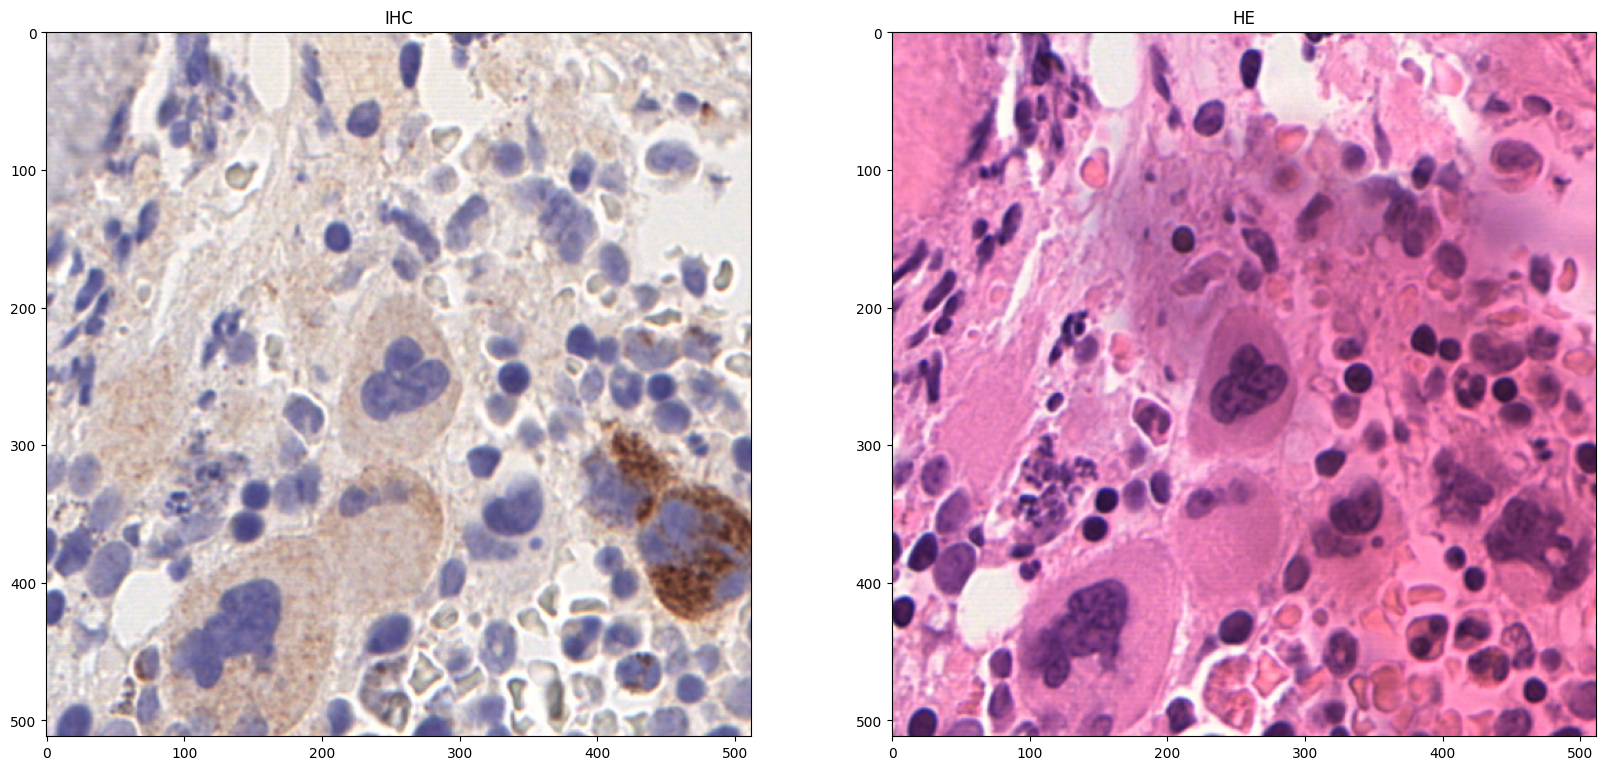

In [38]:
#check that the files in testa and testb are the same

testa_files = os.listdir(test_ihc_img_path)
testb_files = os.listdir(test_he_img_path)

#plot the same image side by side

im1 = cv2.imread(os.path.join(test_ihc_img_path, testa_files[78]))
im2 = cv2.imread(os.path.join(test_he_img_path, testb_files[78]))

fig, axs = plt.subplots(1, 2)
axs[0].imshow(im1)
axs[0].set_title('IHC')
axs[1].imshow(im2)
axs[1].set_title('HE')

plt.show()


